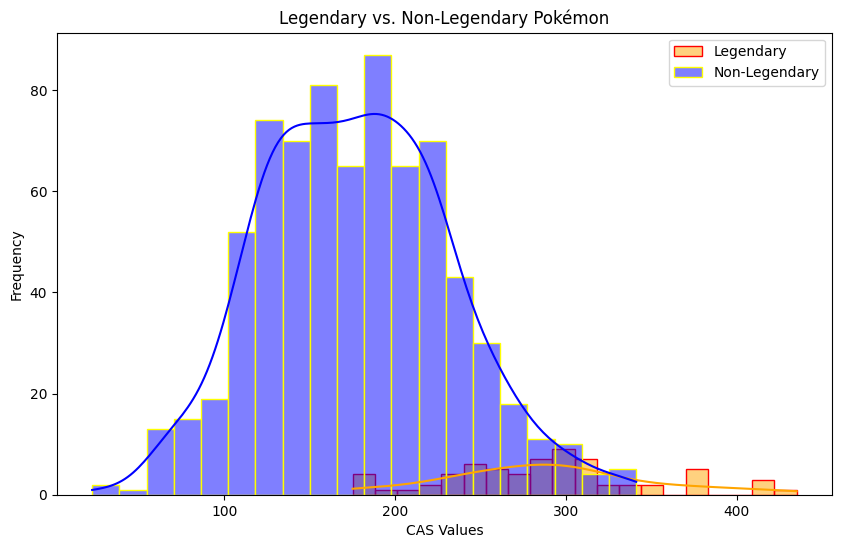

Non-Legendary Pokemons with CAS values close to Legendary Pokemons: 

['Abomasnow' 'AbomasnowMega Abomasnow' 'Absol' 'AbsolMega Absol'
 'Accelgor' 'AegislashBlade Forme' 'Aerodactyl'
 'AerodactylMega Aerodactyl' 'Aggron' 'AggronMega Aggron' 'Alakazam'
 'AlakazamMega Alakazam' 'Altaria' 'AltariaMega Altaria' 'Ambipom'
 'Amoonguss' 'Ampharos' 'AmpharosMega Ampharos' 'Arbok' 'Arcanine'
 'Archen' 'Archeops' 'Armaldo' 'Aromatisse' 'Aurorus' 'Avalugg' 'Banette'
 'BanetteMega Banette' 'Barbaracle' 'Basculin' 'Beartic' 'Beautifly'
 'BeedrillMega Beedrill' 'Beheeyem' 'Bellossom' 'Bibarel' 'Bisharp'
 'Blastoise' 'BlastoiseMega Blastoise' 'Blaziken' 'BlazikenMega Blaziken'
 'Bouffalant' 'Braixen' 'Braviary' 'Breloom' 'Bronzong' 'Cacnea'
 'Cacturne' 'Camerupt' 'CameruptMega Camerupt' 'Carnivine' 'Carracosta'
 'Carvanha' 'Castform' 'Celebi' 'Chandelure' 'Charizard'
 'CharizardMega Charizard X' 'CharizardMega Charizard Y' 'Charmeleon'
 'Chatot' 'Cherrim' 'Chesnaught' 'Chimecho' 'Cinccino' 'Clawitzer

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Pokemon.csv")
df['CAS']=df['Attack']+df['Sp. Atk']+df['Speed']*0.5
#Plotting a CAS histogram for Legendary vs Non-Legendary Pokemon
plt.figure(figsize=(10,6))
sns.histplot(df[df["Legendary"]==True]["CAS"], bins=20, color='orange',label="Legendary", edgecolor='red',kde=True)
sns.histplot(df[df["Legendary"]==False]["CAS"], bins=20, color="blue",label="Non-Legendary", edgecolor="yellow",kde=True)
plt.title("Legendary vs. Non-Legendary Pokémon")
plt.xlabel("CAS Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a=[]
b=df.values.tolist()
casmin=df[df["Legendary"]==True]["CAS"].min()
casmax=df[df["Legendary"]==True]["CAS"].max()
for x in b:
    if casmin<=x[13]<=casmax and x[12]==False:
        a+=[x[1]]
arr=np.array(a)
arr=np.unique(arr)
print("Non-Legendary Pokemons with CAS values close to Legendary Pokemons: \n")
print(arr)

0.9458333333333333
0.6829268292682927
[[213   8]
 [  5  14]]


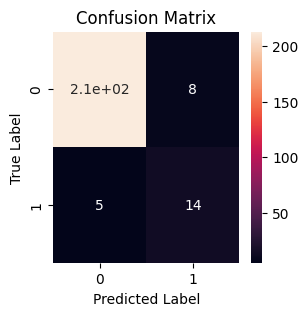

In [2]:
#Training a RandomForestCLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
features=['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
X=df[features]
y=df["Legendary"]
encoder=LabelEncoder()
y_encoded=encoder.fit_transform(y)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42,stratify=y_encoded)
model=RandomForestClassifier(n_estimators=100,random_state=42,class_weight="balanced")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_test,y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

0.9375
0.6511627906976745


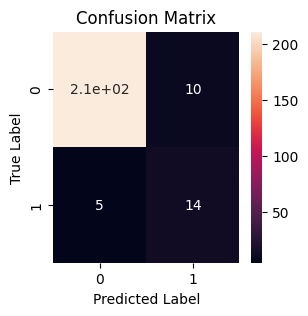

In [3]:
#Training a KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred, y_test))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

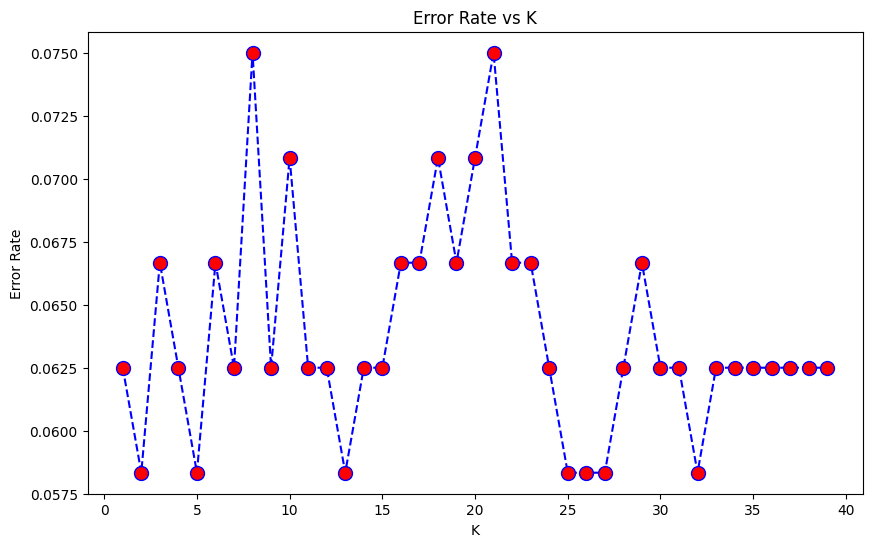

In [4]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

0.9416666666666667
0.5333333333333333
[[218   3]
 [ 11   8]]


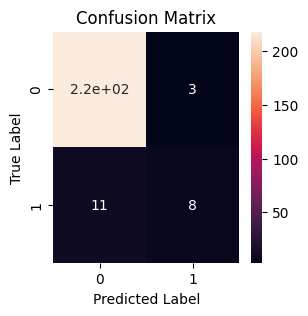

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=13)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_test,y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

0.9333333333333333
0.42857142857142855
[[218   3]
 [ 13   6]]


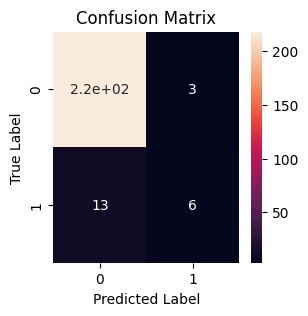

In [6]:
#Training a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred, y_test))
print(confusion_matrix(y_test,y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

RandomForest Classifier is the best from the ones trained.

The histogram showed that some non-legendary Pokémon have CAS values in the Legendary range.
We identified mane Pokemons as high-CAS non-legendaries.
These Pokemons might perform like Legendaries in battles but are not classified as such.
Overall CAS was usefull in identifying some hidden legendaries as seen with the fasle positives(8)
